# Tutorial: Combined Topic Modeling

(last updated 10-07-2022)

In this tutorial, we are going to use our **Combined Topic Model** to get the topics out of a collections of articles.

## Topic Models 

Topic models allow you to discover latent topics in your documents in a completely unsupervised way. Just use your documents and get topics out.

## Contextualized Topic Models

![](https://raw.githubusercontent.com/MilaNLProc/contextualized-topic-models/master/img/logo.png)

What are Contextualized Topic Models? **CTMs** are a family of topic models that combine the expressive power of BERT embeddings with the unsupervised capabilities of topic models to get topics out of documents. 

## Python Package

You can find our package [here](https://github.com/MilaNLProc/contextualized-topic-models).

![https://github.com/MilaNLProc/contextualized-topic-models/actions](https://github.com/MilaNLProc/contextualized-topic-models/workflows/Python%20package/badge.svg) ![https://pypi.python.org/pypi/contextualized_topic_models](https://img.shields.io/pypi/v/contextualized_topic_models.svg) ![https://pepy.tech/badge/contextualized-topic-models](https://pepy.tech/badge/contextualized-topic-models)

# **Before you start...**

If you have additional questions about these topics, follow the links:

- you need to work with languages different than English: [click here!](https://contextualized-topic-models.readthedocs.io/en/latest/language.html#language-specific)
- you can't get good results with topic models: [click here!](https://contextualized-topic-models.readthedocs.io/en/latest/faq.html#i-am-getting-very-poor-results-what-can-i-do)
- you want to load your own embeddings: [click here!](https://contextualized-topic-models.readthedocs.io/en/latest/faq.html#can-i-load-my-own-embeddings)


# Enabling the GPU

First, you'll need to enable GPUs for the notebook:

- Navigate to Edit→Notebook Settings
- select GPU from the Hardware Accelerator drop-down

[Reference](https://colab.research.google.com/notebooks/gpu.ipynb)

# Installing Contextualized Topic Models

First, we install the contextualized topic model library

In [1]:
%%capture
!pip install contextualized-topic-models==2.3.0

In [2]:
%%capture
!pip install pyldavis

## Restart the Notebook

For the changes to take effect, we now need to restart the notebook.

From the Menu:

Runtime → Restart Runtime

# Data

We are going to need some data. You should upload a file with one document per line. We assume you haven't run any preprocessing script.

However, if you want to first test the model without uploading your data, you can simply use the test file I'm putting here

In [ ]:
%%capture
!wget https://raw.githubusercontent.com/vinid/data/master/dbpedia_sample_abstract_20k_unprep.txt

In [ ]:
!head -n 2 dbpedia_sample_abstract_20k_unprep.txt

The Mid-Peninsula Highway is a proposed freeway across the Niagara Peninsula in the Canadian province of Ontario. Although plans for a highway connecting Hamilton to Fort Erie south of the Niagara Escarpment have surfaced for decades,it was not until The Niagara Frontier International Gateway Study was published by the Ministry
Monte Zucker (died March 15, 2007) was an American photographer. He specialized in wedding photography, entering it as a profession in 1947. In the 1970s he operated a studio in Silver Spring, Maryland. Later he lived in Florida. He was Brides Magazine's Wedding Photographer of the Year for 1990 and


In [ ]:
text_file = "dbpedia_sample_abstract_20k_unprep.txt" # EDIT THIS WITH THE FILE YOU UPLOAD

# Importing what we need

In [7]:
from contextualized_topic_models.models.ctm import CombinedTM
from contextualized_topic_models.utils.data_preparation import TopicModelDataPreparation
from contextualized_topic_models.utils.preprocessing import WhiteSpacePreprocessingStopwords
import nltk

RuntimeError: ignored

ImportError: ignored

In [6]:
!pip install numpy --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Preprocessing

Why do we use the **preprocessed text** here? We need text without punctuation to build the bag of word. Also, we might want only to have the most frequent words inside the BoW. Too many words might not help.

In [ ]:
from nltk.corpus import stopwords as stop_words

nltk.download('stopwords')

documents = [line.strip() for line in open(text_file, encoding="utf-8").readlines()[0:2000]]

stopwords = list(stop_words.words("english"))

sp = WhiteSpacePreprocessingStopwords(documents, stopwords_list=stopwords)
preprocessed_documents, unpreprocessed_corpus, vocab, retained_indices = sp.preprocess()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
preprocessed_documents[:2]

['mid peninsula highway across peninsula canadian province ontario although highway connecting fort south decades international study published ministry',
 'died march american photographer photography operated studio silver spring maryland later lived florida magazine photographer year']

We don't discard the non-preprocessed texts, because we are going to use them as input for obtaining the contextualized document representations. 

Let's pass our files with preprocess and unpreprocessed data to our `TopicModelDataPreparation` object. This object takes care of creating the bag of words for you and of obtaining the contextualized BERT representations of documents. This operation allows us to create our training dataset.

Note: Here we use the contextualized model "paraphrase-distilroberta-base-v1".


In [ ]:
tp = TopicModelDataPreparation("all-mpnet-base-v2")

training_dataset = tp.fit(text_for_contextual=unpreprocessed_corpus, text_for_bow=preprocessed_documents)

Downloading:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/571 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/116 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/438M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/239 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/363 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/13.1k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/349 [00:00<?, ?B/s]

Batches:   0%|          | 0/10 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Let's check the first ten words of the vocabulary 

In [ ]:
tp.vocab[:10]

['ab',
 'abbreviated',
 'abroad',
 'academic',
 'academy',
 'accepted',
 'access',
 'according',
 'accounting',
 'achieved']

## Training our Combined TM

Finally, we can fit our new topic model. We will ask the model to find 50 topics in our collection.

In [ ]:
ctm = CombinedTM(bow_size=len(tp.vocab), contextual_size=768, n_components=20, num_epochs=10)
ctm.fit(training_dataset) # run the model

Epoch: [10/10]	 Seen Samples: [20000/20000]	Train Loss: 137.913220703125	Time: 0:00:00.686820: : 10it [00:07,  1.40it/s]
Sampling: [20/20]: : 20it [00:15,  1.26it/s]


# Topics

After training, now it is the time to look at our topics: we can use the 

```
get_topic_lists
```

function to get the topics. It also accepts a parameter that allows you to select how many words you want to see for each topic.

If you look at the topics, you will see that they all make sense and are representative of a collection of documents that comes from Wikipedia (general knowledge). Notice that the topics are in English, because we trained the model on English documents.

In [ ]:
ctm.get_topic_lists(5)

[['politician', 'party', 'june', 'democratic', 'director'],
 ['series', 'studio', 'band', 'released', 'book'],
 ['team', 'stadium', 'division', 'football', 'home'],
 ['village', 'mi', 'capital', 'km', 'administrative'],
 ['england', 'community', 'states', 'list', 'found'],
 ['election', 'party', 'politician', 'house', 'representatives'],
 ['played', 'player', 'olympics', 'former', 'competed'],
 ['region', 'located', 'municipality', 'province', 'one'],
 ['war', 'navy', 'cross', 'professor', 'online'],
 ['river', 'county', 'found', 'north', 'town'],
 ['album', 'released', 'band', 'studio', 'voivodeship'],
 ['television', 'released', 'album', 'debut', 'film'],
 ['census', 'population', 'community', 'designated', 'local'],
 ['born', 'played', 'american', 'former', 'coach'],
 ['football', 'played', 'women', 'season', 'team'],
 ['mount', 'station', 'named', 'range', 'airport'],
 ['medical', 'institute', 'john', 'science', 'york'],
 ['species', 'family', 'genus', 'commonly', 'include'],
 ['st

# Let's Draw!

We can use PyLDAvis to plot our topic in a nice and friendly manner :)

In [ ]:
 lda_vis_data = ctm.get_ldavis_data_format(tp.vocab, training_dataset, n_samples=10)

Sampling: [10/10]: : 10it [00:06,  1.63it/s]


In [ ]:
import pyLDAvis as vis

lda_vis_data = ctm.get_ldavis_data_format(tp.vocab, training_dataset, n_samples=10)

ctm_pd = vis.prepare(**lda_vis_data)
vis.display(ctm_pd)

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable
/usr/local/lib/python3.7/dist-packages/past/builtins/misc.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Mapping
Sampling: [10/10]: : 10it [00:06,  1.65it/s]
/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


# Topic Predictions

Ok now we can take a document and see which topic has been assigned to it. Results will obviously change with respect to the documents you are using. For example, let's predict the topic of the first preprocessed document that is talking about a peninsula.

In [ ]:
topics_predictions = ctm.get_thetas(training_dataset, n_samples=5) # get all the topic predictions

Sampling: [5/5]: : 5it [00:03,  1.62it/s]


In [ ]:
preprocessed_documents[0] # see the text of our preprocessed document

'mid peninsula highway across peninsula canadian province ontario although highway connecting fort south decades international study published ministry'

In [ ]:
import numpy as np
topic_number = np.argmax(topics_predictions[0]) # get the topic id of the first document

In [ ]:
topic_number

15

In [ ]:
ctm.get_topic_lists(5)[15]

['mount', 'station', 'named', 'range', 'airport']

In [ ]:
ctm.get_topic_lists(5)[topic_number] #and the topic should be about natural location/places/related things

['mount', 'station', 'named', 'range', 'airport']

# Save Our Model for Later Use

In [ ]:
ctm.save(models_dir="./")

/content/contextualized-topic-models/contextualized_topic_models/models/ctm.py:446: Warning: This is an experimental feature that we has not been fully tested. Refer to the following issue:https://github.com/MilaNLProc/contextualized-topic-models/issues/38
  Warning)


In [ ]:
# let's remove the trained model
del ctm

In [ ]:
ctm = CombinedTM(bow_size=len(tp.vocab), contextual_size=768, num_epochs=100, n_components=50)

ctm.load("/content/contextualized_topic_model_nc_50_tpm_0.0_tpv_0.98_hs_prodLDA_ac_(100, 100)_do_softplus_lr_0.2_mo_0.002_rp_0.99",
                                                                                                      epoch=19)

/content/contextualized-topic-models/contextualized_topic_models/models/ctm.py:471: Warning: This is an experimental feature that we has not been fully tested. Refer to the following issue:https://github.com/MilaNLProc/contextualized-topic-models/issues/38
  Warning)


In [ ]:
ctm.get_topic_lists(5)

[['mi', 'east', 'lies', 'south', 'village'],
 ['world', 'women', 'team', 'cup', 'international'],
 ['founded', 'school', 'education', 'university', 'established'],
 ['studied', 'painter', 'paris', 'french', 'german'],
 ['played', 'born', 'english', 'made', 'right'],
 ['film', 'directed', 'written', 'produced', 'stars'],
 ['league', 'football', 'played', 'american', 'team'],
 ['album', 'released', 'island', 'river', 'band'],
 ['de', 'greek', 'king', 'french', 'son'],
 ['member', 'party', 'politician', 'general', 'elected'],
 ['university', 'american', 'professor', 'received', 'college'],
 ['church', 'roman', 'catholic', 'century', 'diocese'],
 ['municipality', 'region', 'area', 'kilometres', 'mi'],
 ['mi', 'west', 'km', 'county', 'south'],
 ['population', 'area', 'county', 'town', 'census'],
 ['built', 'house', 'building', 'story', 'style'],
 ['game', 'developed', 'video', 'games', 'playstation'],
 ['used', 'often', 'term', 'form', 'usually'],
 ['published', 'book', 'written', 'books', 

In [1]:
tarin_data=[['mi', 'east', 'lies', 'south', 'village'],
 ['world', 'women', 'team', 'cup', 'international'],
 ['founded', 'school', 'education', 'university', 'established'],
 ['studied', 'painter', 'paris', 'french', 'german'],
 ['played', 'born', 'english', 'made', 'right']]

In [2]:
train=[]
for i in tarin_data:
  s=""
  for word in i:
    s=s+" "+word
  train.append(s.strip())

In [3]:
train

['mi east lies south village',
 'world women team cup international',
 'founded school education university established',
 'studied painter paris french german',
 'played born english made right']

In [4]:
train_labels=[[1,0],[1,0],[1,0],[0,1],[0,1]]

In [5]:
#!pip install lambeq
from lambeq import BobcatParser

parser = BobcatParser(root_cats=('NP', 'N'), verbose='text')



In [6]:
raw_train_diagrams = parser.sentences2diagrams(train, suppress_exceptions=True)

Tagging sentences.
Parsing tagged sentences.
Turning parse trees to diagrams.


In [25]:
raw_train_diagrams[3].draw(figsize=(9, 5), fontsize=12)

AttributeError: ignored

In [18]:
train_diagrams = [
    diagram.normal_form()
    for diagram in raw_train_diagrams if diagram is not None
]

In [24]:
(raw_train_diagrams[3]).draw(figsize=(9, 5), fontsize=12)

AttributeError: ignored

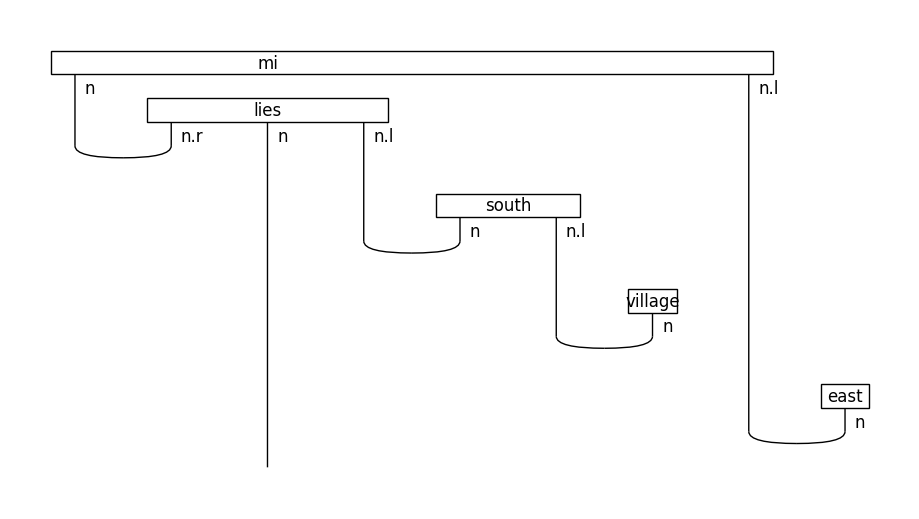

In [11]:
train_diagrams[0].draw(figsize=(9, 5), fontsize=12)

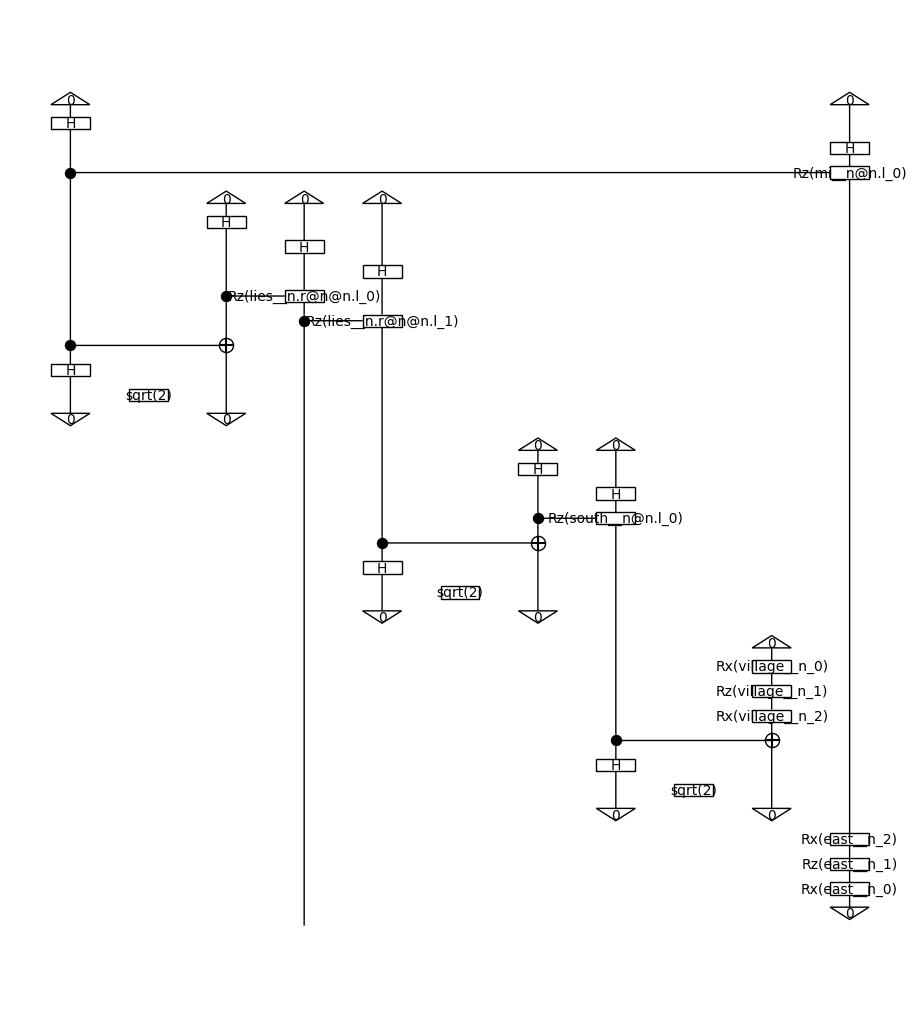

In [8]:
from lambeq import AtomicType, IQPAnsatz, remove_cups

ansatz = IQPAnsatz({AtomicType.NOUN: 1, AtomicType.SENTENCE: 0},
                   n_layers=1, n_single_qubit_params=3)

train_circuits = [ansatz(remove_cups(diagram)) for diagram in train_diagrams]


train_circuits[0].draw(figsize=(9, 10))

In [9]:
from pytket.extensions.qiskit import AerBackend
from lambeq import TketModel

all_circuits = train_circuits 

backend = AerBackend()
backend_config = {
    'backend': backend,
    'compilation': backend.default_compilation_pass(2),
    'shots': 8192
}

model = TketModel.from_diagrams(all_circuits, backend_config=backend_config)

In [ ]:
!pip install pytket-qiskit

In [10]:
from lambeq import BinaryCrossEntropyLoss

# Using the builtin binary cross-entropy error from lambeq
bce = BinaryCrossEntropyLoss()

acc = lambda y_hat, y: np.sum(np.round(y_hat) == y) / len(y) / 2  # half due to double-counting
eval_metrics = {"acc": acc}

In [42]:
from lambeq import QuantumTrainer, SPSAOptimizer

trainer = QuantumTrainer(
    model,
    loss_function=bce,
    epochs=10,
    optimizer=SPSAOptimizer,
    optim_hyperparams={'a': 0.05, 'c': 0.06, 'A':0.01*10},
    evaluate_functions=eval_metrics,
    evaluate_on_train=True,
    verbose = 'text',
    seed=0
)

In [34]:
train_labels=[[1, 0], [1, 0], [1, 0], [0, 1]]

In [43]:
from lambeq import Dataset

train_dataset = Dataset(
            train_circuits,
            train_labels,
            batch_size=1)

In [17]:
len(train_labels),len(train_circuits),len(train_diagrams),len(raw_train_diagrams)

(5, 4, 4, 5)

In [45]:
import numpy as np
trainer.fit(train_dataset, evaluation_step=1, logging_step=1)

Epoch 1:   train/loss: 0.2842   valid/loss: -----   train/acc: 0.8750   valid/acc: -----
Epoch 2:   train/loss: 0.1670   valid/loss: -----   train/acc: 1.0000   valid/acc: -----
Epoch 3:   train/loss: 0.2842   valid/loss: -----   train/acc: 0.7500   valid/acc: -----
Epoch 4:   train/loss: 0.2024   valid/loss: -----   train/acc: 0.7500   valid/acc: -----
Epoch 5:   train/loss: 0.2237   valid/loss: -----   train/acc: 1.0000   valid/acc: -----
Epoch 6:   train/loss: 0.2344   valid/loss: -----   train/acc: 0.7500   valid/acc: -----
Epoch 7:   train/loss: 0.2131   valid/loss: -----   train/acc: 0.8750   valid/acc: -----
Epoch 8:   train/loss: 0.2053   valid/loss: -----   train/acc: 1.0000   valid/acc: -----
Epoch 9:   train/loss: 0.1616   valid/loss: -----   train/acc: 1.0000   valid/acc: -----
Epoch 10:  train/loss: 0.1762   valid/loss: -----   train/acc: 1.0000   valid/acc: -----

Training completed!


In [48]:
model(train_circuits),train_labels

(array([[1.        , 0.        ],
        [1.        , 0.        ],
        [0.44827586, 0.55172414],
        [0.        , 1.        ]]),
 [[1, 0], [1, 0], [1, 0], [0, 1]])

In [ ]:
!pip install transformers==2.2.0
!pip install bert-extractive-summarizer

In [11]:

from summarizer import Summarizer#,TransformerSummarizer


ImportError: ignored

In [3]:
body='''Proof The Mainstream Media Is Manipulating The Election By Taking Bill Clinton Out Of ContextI woke up this morning to find a variation of this headline splashed all over my news feed:

Bill Clinton: â€˜Naturalâ€™ For Foundation Donors to Seek Favors

Hereâ€™s Google:

Naturally, my reaction was â€œoh, s**t, what did Bill Clinton do to damage his wifeâ€™s campaign now?â€

Of course, the headline sounds really, really awful. It plays right into the idea that the Clinton Foundation is all about pay to play, just like Donald Trump has been saying all along. Unfortunately, it takes reading beyond the headlines, which is something most people donâ€™t do, to find out the real story â€“ and the real story is that there is no pay to play.

â€œIt was natural for people whoâ€™ve been our political allies and personal friends to call and ask for things. And I trusted the State Department wouldnâ€™t do anything they shouldnâ€™t do,â€ Clinton told NPR in an interview that aired Monday morning. Source: CNN

In other words, people can ask for favors, but that certainly doesnâ€™t mean theyâ€™ll get them. Leaked emails have shown that some Clinton Foundation donors have gotten meetings with Clinton and that others were turned down. There is zero evidence of pay to play. In other words, people might have asked for favors, but thereâ€™s no evidence they got them.

Now, letâ€™s talk about the foundation the media doesnâ€™t like to mention, the Trump Foundation. Trump hasnâ€™t given to his own foundation since 2008. He does collect money from others, though, and gives it in his name. He also takes from the charity and allegedly buys things like oil paintings and football helmets, all for himself, but out of charity money.

New York Attorney General Eric Schneiderman said in a September 13 CNN interview that his office is investigating Trumpâ€™s charitable foundation over concerns that it â€œengaged in some improprietyâ€ as related to New York charity laws. The investigation launched amid reports from The Washington Post that Trump spent money from his charity on items meant to benefit himself, such as a $20,000 oil painting of himself and a $12,000 autographed football helmet, and also recycled othersâ€™ contributions â€œto make them appear to have come from himâ€ although he â€œhasnâ€™t given to the foundation since 2008.â€ Source: Media Matters

Media Matters goes on to talk about the double standard and about how clearly the mainstream media is trying to promote Trump at the cost of Clintonâ€™s candidacy:

Journalists have been criticized for the â€œdouble standardâ€ in the ways they cover Trump and Democratic presidential nominee Hillary Clinton. Earlier this month, cable news programs devoted 13 times more coverage to Clintonâ€™s pneumonia diagnosis as The Washington Postâ€™s reporting about the Trump Foundation. This week, both the Trump Foundation and Trump Organization stories were given short shrift by the broadcast news programs in favor of coverage of Donald Trumpâ€™s Dr. Oz stunt.

All of this biased coverage is hurting Clinton and helping Trump. Trump has seen major gains over the last few weeks, largely because the media covers every minor Clinton â€œscandalâ€ (if you call getting sick a â€œscandalâ€) while ignoring every scandal in Trumpâ€™s closet, and trust me, there are a lot.

Featured image via Ethan Miller/Getty Images.Wendy Gittleson'''

In [10]:
bert_model = Summarizer()
bert_summary = ''.join(bert_model(body, min_length=60))
print(bert_summary)

NameError: ignored

In [8]:
pip install --upgrade transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached transformers-4.29.1-py3-none-any.whl (7.1 MB)
  Attempting uninstall: transformers
    Found existing installation: transformers 2.2.0
    Uninstalling transformers-2.2.0:
      Successfully uninstalled transformers-2.2.0


In [1]:
!pip install -q bert-extractive-summarizer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 77.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 21.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 107.6 MB/s eta 0:00:00


In [2]:
from summarizer import Summarizer

In [3]:
model=Summarizer()

Some weights of the model checkpoint at bert-large-uncased were not used when initializing BertModel: ['cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [1]:
import pandas as pd
data=pd.read_csv('/content/concatenated_data.csv')

FileNotFoundError: ignored

In [17]:
data=data['Fake_Genuine'].tolist()

In [12]:
result=model(data[0],num_sentences=1,min_length=10)

In [13]:
result

'Proof The Mainstream Media Is Manipulating The Election By Taking Bill Clinton Out Of ContextI woke up this morning to find a variation of this headline splashed all over my news feed:\n\nBill Clinton: ‘Natural’ For Foundation Donors to Seek Favors\n\nHere’s Google:\n\nNaturally, my reaction was “oh, s**t, what did Bill Clinton do to damage his wife’s campaign now?”'

In [19]:
abstractive_summarization_data=[]
for each_sentence in data:
    abstractive_summarization_data.append(model(each_sentence,num_sentences=1,min_length=10))

In [21]:
len(data),len(abstractive_summarization_data)

(422, 422)

In [23]:
data['abstractive_summarization_data']=abstractive_summarization_data

In [24]:
data.to_csv('\abstractive_concatenated_data.csv')

In [11]:
data[1]

'Charity: Clinton Foundation Distributed “Watered-Down” AIDS Drugs to Sub-Saharan Africa – Eagle RisingFormer President Bill Clinton and his Clinton Health Access Initiative (CHAI) distributed “watered-down” HIV/AIDs drugs to patients in sub-Saharan Africa, and “likely increased” the risks of morbidity and mortality, according to a draft congressional report obtained by The Daily Caller News Foundation.'

In [1]:
### USing Topic Modelling

In [ ]:
!pip install contextualized-topic-models

In [2]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"

In [2]:
from contextualized_topic_models.models.ctm import CombinedTM
from contextualized_topic_models.utils.data_preparation import TopicModelDataPreparation
from contextualized_topic_models.utils.preprocessing import WhiteSpacePreprocessingStopwords
import nltk

In [3]:
import pandas as pd
data=pd.read_csv('/content/_bstractive_concatenated_data.csv')


In [9]:
data=data['abstractive_summarization_data']

In [3]:
data=data['abstractive_summarization_data']

In [4]:
data=data.tolist()

In [4]:
from nltk.corpus import stopwords as stop_words

nltk.download('stopwords')

documents = [line.strip() for line in data]

stopwords = list(stop_words.words("english"))

sp = WhiteSpacePreprocessingStopwords(documents, stopwords_list=stopwords)
preprocessed_documents, unpreprocessed_corpus, vocab, retained_indices = sp.preprocess()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [10]:
len(preprocessed_documents),len(unpreprocessed_corpus)

(419, 419)

In [8]:
tp = TopicModelDataPreparation("all-mpnet-base-v2")

training_dataset = tp.fit(text_for_contextual=unpreprocessed_corpus, text_for_bow=preprocessed_documents)

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

In [10]:
ctm = CombinedTM(bow_size=len(tp.vocab), contextual_size=768, n_components=5, num_epochs=100)
ctm.fit(training_dataset) # run the model

0it [00:00, ?it/s]

ZeroDivisionError: ignored

In [ ]:
!pip install pyldavis

In [7]:
 lda_vis_data = ctm.get_ldavis_data_format(tp.vocab, training_dataset, n_samples=10)

AttributeError: ignored

In [41]:
import pyLDAvis as vis

lda_vis_data = ctm.get_ldavis_data_format(tp.vocab, training_dataset, n_samples=10)

ctm_pd = vis.prepare(**lda_vis_data)
vis.display(ctm_pd)

100%|██████████| 7/7 [00:00<00:00, 16.35it/s]
ERROR:concurrent.futures:exception calling callback for <Future at 0x7f85064df880 state=finished raised BrokenProcessPool>
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py", line 391, in _process_worker
    call_item = call_queue.get(block=True, timeout=timeout)
  File "/usr/lib/python3.10/multiprocessing/queues.py", line 122, in get
    return _ForkingPickler.loads(res)
ModuleNotFoundError: No module named 'pandas.core.indexes.numeric'
"""

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/_base.py", line 26, in _invoke_callbacks
    callback(self)
  File "/usr/local/lib/python3.10/dist-packages/joblib/parallel.py", line 385, in __call__
    self.parallel.dispatch_next()
  File "/u

BrokenProcessPool: ignored

In [12]:
topics_predictions = ctm.get_thetas(training_dataset, n_samples=5) 

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
100%|██████████| 7/7 [00:01<00:00,  4.59it/s]


In [14]:
## Predicting the topics no
len(topics_predictions[0])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


419

In [16]:
ctm.get_topic_lists(5)[0]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['wedding', 'gifts', 'began', 'anniversary', 'lawyer']

In [22]:
ctm.get_topic_lists(10)[3]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['presidential',
 'donald',
 'trump',
 'mccain',
 'york',
 'cnn',
 'paul',
 'washington',
 'republican',
 'fires']

In [23]:
ctm.get_doc_topic_distribution(training_dataset)

NameError: ignored

In [28]:
ctm.get_topics()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


defaultdict(list,
            {0: ['wedding',
              'gifts',
              'began',
              'anniversary',
              'lawyer',
              'immigrant',
              'mail',
              'airstrike',
              'cop',
              'negotiations'],
             1: ['apparently',
              'spouse',
              'struggle',
              'protesters',
              'department',
              'lose',
              'show',
              'uncertain',
              'lying',
              'charlotte'],
             2: ['videosexternal',
              'foundation',
              'first',
              'wanted',
              'bill',
              'tight',
              'state',
              'happy',
              'hosting',
              'gentleman'],
             3: ['presidential',
              'donald',
              'trump',
              'mccain',
              'york',
              'cnn',
              'paul',
              'washington',
              're

In [29]:
ctm.get_topic_lists()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[['wedding',
  'gifts',
  'began',
  'anniversary',
  'lawyer',
  'immigrant',
  'mail',
  'airstrike',
  'cop',
  'negotiations'],
 ['apparently',
  'spouse',
  'struggle',
  'protesters',
  'department',
  'lose',
  'show',
  'uncertain',
  'lying',
  'charlotte'],
 ['videosexternal',
  'foundation',
  'first',
  'wanted',
  'bill',
  'tight',
  'state',
  'happy',
  'hosting',
  'gentleman'],
 ['presidential',
  'donald',
  'trump',
  'mccain',
  'york',
  'cnn',
  'paul',
  'washington',
  'republican',
  'fires']]

In [30]:
import gensim.corpora as corpora

# Create Dictionary
#
tokens=[]
for i in preprocessed_documents:
    tokens.append(i.split(" "))
id2word = corpora.Dictionary(tokens)

In [32]:
(id2word)

In [35]:
from gensim.models import CoherenceModel

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=ctm, texts=unpreprocessed_corpus, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('Coherence Score: ', coherence_lda)

Coherence Score:  nan


/usr/local/lib/python3.10/dist-packages/gensim/topic_coherence/direct_confirmation_measure.py:204: RuntimeWarning: divide by zero encountered in double_scalars
  m_lr_i = np.log(numerator / denominator)
/usr/local/lib/python3.10/dist-packages/gensim/topic_coherence/indirect_confirmation_measure.py:323: RuntimeWarning: invalid value encountered in double_scalars
  return cv1.T.dot(cv2)[0, 0] / (_magnitude(cv1) * _magnitude(cv2))


In [22]:
ctm.get_word_distribution_by_topic_id(1)

NameError: ignored